This is work of Alina Dzemiantsevich ademencevich@gmail.com

## Project description

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.

You'll study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

**Description of the data**

A database with info on taxi rides in Chicago: 
<blockquote>
<b>neighborhoods table:</b> data on city neighborhoods<br>
<b>name:</b> name of the neighborhood <br>
<b>neighborhood_id:</b> neighborhood code<br>

<b>cabs table:</b> data on taxis<br>
<b>cab_id:</b> vehicle code<br>
<b>vehicle_id:</b> the vehicle's technical ID <br>
<b>company_name:</b> the company that owns the vehicle<br>
    
    
<b>trips table:</b> data on rides<br>
<b>trip_id:</b> ride code<br>
<b>cab_id:</b> code of the vehicle operating the ride<br>
<b>start_ts:</b> date and time of the beginning of the ride (time rounded to the hour)<br>
<b>end_ts:</b> date and time of the end of the ride (time rounded to the hour) duration_seconds: ride duration in seconds<br>
<b>distance_miles:</b> ride distance in miles<br>
<b>pickup_location_id:</b> pickup neighborhood code<br>
<b>dropoff_location_id:</b> dropoff neighborhood code<br>
    
    
<b>weather_records table:</b> data on weather <br>
<b>record_id:</b> weather record code<br>
<b>ts:</b> record date and time (time rounded to the hour) <br>
<b>temperature:</b> temperature when the record was taken<br>
<b>description:</b> brief description of weather conditions, e.g. "light rain" or "scattered clouds"<br>

</blockquote>

![](https://drive.google.com/file/d/13rrfpBCyjY1UVSoEbvBw6TdVLor4JM5L/view?usp=sharing)

Note: there isn't a direct connection between the tables trips and weather_records in the database. But you can still use JOIN and link them using the time the ride started (trips.start_ts) and the time the weather record was taken (weather_records.ts).

### Table of Contents

* [Step 1. Write a code to parse the data on weather in Chicago in November 2017 ](#step1)
* [Step 2. Exploratory data analysis (SQL on the platform)](#step2)
* [Step 3. Test the hypothesis (SQL on the platform)](#step3)
* [Step 4. Exploratory data analysis (Python)](#step4)
* [Step 5. Testing hypotheses (Python)](#step5)
* [Step 6. Overall Conclusion](#step6)

### Step 1. Write a code to parse the data on weather in Chicago in November 2017 from the website:
<a class="anchor" id="step1"></a>
http://slava-public-access.s3-website-eu-west-1.amazonaws.com

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [2]:
#our URL
URL='http://slava-public-access.s3-website-eu-west-1.amazonaws.com/'
req = requests.get(URL) # GET-request
soup = BeautifulSoup(req.text, 'lxml') #create a BeautifulSoup object

In [3]:
#let's see what we got
#print(soup)

In [4]:
# List where the names of the columns will be stored
heading_table = [] 
# The names of the columns are inside <th> elements
for row in soup.find_all('th'): 
# so we'll find all <th> elements in the table and run them through in a loop
        heading_table.append(row.text) # Add the content from the <th> tag to the heading_table list using append() 
print(heading_table) 

['Date and time', 'Temperature', 'Description']


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:

Yes, we have three columns.
</div>

In [5]:
content=[] # list where the table data will be stored
for row in soup.find_all('tr'): 
# Each row is wrapped in a <tr> tag, we need to loop through all the rows
    if not row.find_all('th'): 
# We need this condition to ignore the first row of the table, with headings
            content.append([element.text for element in row.find_all('td')])
            # Within each row the cell content is wrapped in <td> </td> tags
            # We need to loop through all <td> elements, extract the content from the cells, and add it to the list
            # Then add each of the lists to the content list
#print(content)

In [6]:
#we got three-dimensional list object
type(content)

list

In [7]:
weather = pd.DataFrame(content, columns=heading_table) 
# pass three-dimensional content list as data and heading_table as headings
weather.head() 

,Date and time,Temperature,Description
0,2017-11-01 00:00:00,276.150,broken clouds
1,2017-11-01 01:00:00,275.700,scattered clouds
2,2017-11-01 02:00:00,275.610,overcast clouds
3,2017-11-01 03:00:00,275.350,broken clouds
4,2017-11-01 04:00:00,275.240,broken clouds


In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date and time  697 non-null    object
 1   Temperature    697 non-null    object
 2   Description    697 non-null    object
dtypes: object(3)
memory usage: 16.5+ KB


In [9]:
#let's remove spaces in column name 'Date and time'
weather.rename(columns={'Date and time':'Date_and_time'}, inplace=True)
#make columns lowercase
weather.columns = weather.columns.str.lower()
weather.columns

Index(['date_and_time', 'temperature', 'description'], dtype='object')

In [10]:
#convert 'date_and_time' into datetime type
weather['date_and_time'] = pd.to_datetime(weather['date_and_time'],format='%Y.%m.%d')

In [11]:
#convert 'temperature' column into float type
weather['temperature']=weather['temperature'].astype('float')

In [12]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_and_time  697 non-null    datetime64[ns]
 1   temperature    697 non-null    float64       
 2   description    697 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 16.5+ KB


In [13]:
weather.describe()

,temperature
count,697.000000
mean,277.548864
std,4.515403
min,265.740000
25%,274.240000
50%,277.410000
75%,280.980000
max,289.760000


In [14]:
weather.tail() 

,date_and_time,temperature,description
692,2017-11-29 20:00:00,281.34,few clouds
693,2017-11-29 21:00:00,281.69,sky is clear
694,2017-11-29 22:00:00,281.07,few clouds
695,2017-11-29 23:00:00,280.06,sky is clear
696,2017-11-30 00:00:00,278.46,sky is clear


### Conclusion 
<a class="anchor" id="#step11"></a>

- I parsed the data about the weather in Chicago in November 2017. 
- I used for parsing html data the BeautifulSoup library. 
- I putted the weather data into a dataframe which contain 697 non-null rows. 
- All rows were object type
- I converted 'Date and time' column into date type and 'Temperature' column into float type. 
- I made all column names lower case and removed spaces in 'Date and time' column name.

###  Step 2. Exploratory data analysis (SQL on the platform)
<a class="anchor" id="step2"></a>

<ol>
 <li>Find the number of taxi rides for each taxi company for November 15-16, 2017. Name the resulting field trips_amount and print it along with the company_name field. Sort the results by the trips_amount field in descending order.</li>
    
 <li>Find the number of rides for every taxi company whose name contains the words "Yellow" or "Blue" for November 1-7, 2017. Name the resulting variable trips_amount. Group the results by the company_name field.</li>
    
 <li>In November 2017, the most popular taxi companies were Flash Cab and Taxi Affiliation Services. Find the number of rides for these two companies and name the resulting variable trips_amount. Join the rides for all other companies in the group "Other." Group the data by taxi company names. Name the field with taxi company names company. Sort the result in descending order by trips_amount.</li>
</ol>

1. Print the company_name field. Find the number of taxi rides for each taxi company for November 15-16, 2017, name the resulting field trips_amount, and print it, too. Sort the results by the trips_amount field in descending order.

*Hint*
Join the tables cabs and trips. Use aggregate functions and grouping. Don't forget to introduce a condition.

`
SELECT
    cabs.company_name AS company_name,
    COUNT (trips.trip_id) AS trips_amount
FROM
   cabs
RIGHT JOIN trips ON cabs.cab_id = trips.cab_id
WHERE trips.start_ts::date IN ('2017-11-15','2017-11-16')
GROUP BY cabs.company_name
ORDER BY trips_amount DESC;
`

2. Find the number of rides for every taxi company whose name contains the words "Yellow" or "Blue" for November 1-7, 2017. Name the resulting variable trips_amount. Group the results by the company_name field.

`
SELECT
    cabs.company_name AS company_name,
    COUNT (trips.trip_id) AS trips_amount
FROM
   cabs
RIGHT JOIN trips ON cabs.cab_id = trips.cab_id
WHERE trips.start_ts::date IN ('2017-11-01','2017-11-02','2017-11-03','2017-11-04','2017-11-05','2017-11-06','2017-11-07') AND
    (cabs.company_name LIKE '%Yellow%' OR 
     cabs.company_name LIKE '%Blue%')
GROUP BY cabs.company_name;
`

3.
For November 1-7, 2017, the most popular taxi companies were Flash Cab and Taxi Affiliation Services. Find the number of rides for these two companies and name the resulting variable trips_amount. Join the rides for all other companies in the group "Other." Group the data by taxi company names. Name the field with taxi company names company. Sort the result in descending order by trips_amount.

`
SELECT
    CASE WHEN cabs.company_name = 'Flash Cab'
        THEN 'Flash Cab'
        WHEN cabs.company_name = 'Taxi Affiliation Services'
        THEN 'Taxi Affiliation Services'
        ELSE 'Other' END AS company,
    COUNT (trips.trip_id) AS trips_amount
FROM
   cabs
RIGHT JOIN trips ON cabs.cab_id = trips.cab_id
WHERE trips.start_ts::date IN ('2017-11-01','2017-11-02','2017-11-03','2017-11-04','2017-11-05','2017-11-06','2017-11-07') 
GROUP BY company
ORDER BY trips_amount desc;
`

###  Step 3. Test the hypothesis that the duration of rides from the the Loop to O'Hare International Airport changes on rainy Sundays. (SQL on the platform)
<a class="anchor" id="step3"></a>

<ol>
<li>Retrieve the identifiers of the O'Hare and Loop neighborhoods from the neighborhoods table.</li>
    
<li>For each hour, retrieve the weather condition records from the weather_records table. Using the CASE operator, break all hours into two groups: "Bad" if the description field contains the words "rain" or "storm," and "Good" for others. Name the resulting field weather_conditions. The final table must include two fields: date and hour (ts) and weather_conditions.</li>
    
<li>Retrieve from the trips table all the rides that started in the Loop (neighborhood_id: 50) and ended at O'Hare (neighborhood_id: 63) on a Sunday. Get the weather conditions for each ride. Use the method you applied in the previous task. Also retrieve the duration of each ride. Ignore rides for which data on weather conditions is not available.</li>

1. Retrieve the identifiers of the O'Hare and Loop neighborhoods from the neighborhoods table.

`
SELECT
    neighborhood_id,
    name
FROM
    neighborhoods
WHERE
    name LIKE '%Hare' OR name LIKE 'Loop';
    `

2. For each hour, retrieve the weather condition records from the weather_records table. Using the CASE operator, break all hours into two groups: "Bad" if the description field contains the words '"rain" or "storm," and "Good" for others. Name the resulting field weather_conditions. The final table must include two fields: date and hour (ts) and weather_conditions.

`
SELECT
    ts AS ts,
    CASE WHEN description LIKE '%rain%' OR description LIKE '%storm%'
         THEN 'Bad'
         ELSE 'Good' END AS weather_conditions
FROM
    weather_records
    `

3. Retrieve from the trips table all the rides that started in the Loop (neighborhood_id: 50) on a Saturday and ended at O'Hare (neighborhood_id: 63). Get the weather conditions for each ride. Use the method you applied in the previous task. Also retrieve the duration of each ride. Ignore rides for which data on weather conditions is not available.

The table columns should be in the following order:
		start_ts
		weather_conditions
		duration_seconds
Sort by trip_id.

`
SELECT
    trips.start_ts,
    CASE WHEN description LIKE '%rain%' OR description LIKE '%storm%'
         THEN 'Bad'
         ELSE 'Good' END AS weather_conditions,
    trips.duration_seconds
FROM
    trips
INNER JOIN weather_records ON trips.start_ts = weather_records.ts
WHERE
    trips.pickup_location_id = 50 AND
    EXTRACT(dow FROM trips.start_ts) = 6 AND 
    trips.dropoff_location_id = 63
ORDER BY trips.trip_id;
`

###  Step 4. Exploratory data analysis (Python)
<a class="anchor" id="step4"></a>

In addition to the data you retrieved in the previous tasks, you've been given a second file. You now have these two CSVs:<br>
<br>
<li><b>project_sql_result_01.csv</b><br>
It contains the following data:<br>
- company_name: taxi company name<br>
- trips_amount: the number of rides for each taxi company on November 15-16, 2017</li><br>


<li><b>project_sql_result_04.csv</b><br>
It contains the following data: <br>
- dropoff_location_name: Chicago neighborhoods where rides ended <br>
- average_trips: the average number of rides that ended in each neighborhood in November 2017.</li>

For these two datasets you now need to:
- import the files
- study the data they contain
- make sure the data types are correct
- identify the top 10 neighborhoods in terms of drop-offs
- make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- draw conclusions based on each graph and explain the results

In [15]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import floor, ceil
from functools import reduce

The first file we read contain the following data:
- company_name: taxi company name
- trips_amount: the number of rides for each taxi company on November 15-16, 2017

In [17]:
#rides_taxi_company = pd.read_csv('project_sql_result_01.csv')

#code for the platform:
rides_taxi_company = pd.read_csv('project_sql_result_01.csv')

In [18]:
rides_taxi_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


We see that the first dataset contain only 64 rows. 

Columns do not require converting data types: trips are numerical and are int64 type and names of the taxi companies are strings.

Let's look on the data.

In [19]:
rides_taxi_company.sample(10)

,company_name,trips_amount
16,Blue Diamond,2070
20,Checker Taxi,1486
53,5006 - 39261 Salifu Bawa,14
43,2809 - 95474 C & D Cab Co Inc.,29
57,Metro Group,11
17,Chicago Medallion Management,1955
11,Globe Taxi,4383
0,Flash Cab,19558
63,3556 - 36214 RC Andrews Cab,2
55,6057 - 24657 Richard Addo,13


Let's read the second file. It contains the following data:
- dropoff_location_name: Chicago neighborhoods where rides ended
- average_trips: the average number of rides that ended in each neighborhood in November 2017.

In [20]:
#end_neighborhoods = pd.read_csv('project_sql_result_04.csv')

#code for the platform:
end_neighborhoods = pd.read_csv('project_sql_result_04.csv')

In [21]:
end_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [22]:
end_neighborhoods.sample(10)

,dropoff_location_name,average_trips
1,River North,9523.666667
58,Englewood,25.433333
19,Old Town,469.566667
52,Little Village,33.800000
49,"Sauganash,Forest Glen",43.566667
21,North Center,393.266667
54,North Lawndale,32.166667
65,Ashburn,16.133333
89,Mount Greenwood,3.137931
31,Lower West Side,143.300000


The end_neighborhoods dataset contain 94 rows. 

Columns do not require converting data types: 
- the column dropoff_location_name contain names of neighborhoods where rides ended and it is string type.
- the column average_trips is numerical of float data type. This column contain data about the average number of rides that ended in each neighborhood in November 2017. 

**Identify the top 10 neighborhoods in terms of drop-offs.**

In [23]:
#Let's find the top 10 neighborhoods by average number of rides that ended in each neighborhood
top10neighborhoods = end_neighborhoods.sort_values(by='average_trips',ascending = False).head(10)
top10neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [24]:
top10neighborhoods['dropoff_location_name']

0                  Loop
1           River North
2         Streeterville
3             West Loop
4                O'Hare
5             Lake View
6            Grant Park
7         Museum Campus
8            Gold Coast
9    Sheffield & DePaul
Name: dropoff_location_name, dtype: object

**Make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs.** <br>
Draw conclusions based on each graph and explain the results.

In [25]:
rides_taxi_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [26]:
#the 4th quartile of taxi companies by number of rides
rides_taxi_company[rides_taxi_company['trips_amount']>2106]

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [27]:
print('Number of taxi companies with the highest number of rides',len(rides_taxi_company[rides_taxi_company['trips_amount']>2106]))

print('Share of taxi companies with the highest number of rides', (((len(rides_taxi_company[rides_taxi_company['trips_amount']>2106]))/(len(rides_taxi_company['trips_amount'])))*100),'%')
                                                                  

Number of taxi companies with the highest number of rides 16
Share of taxi companies with the highest number of rides 25.0 %


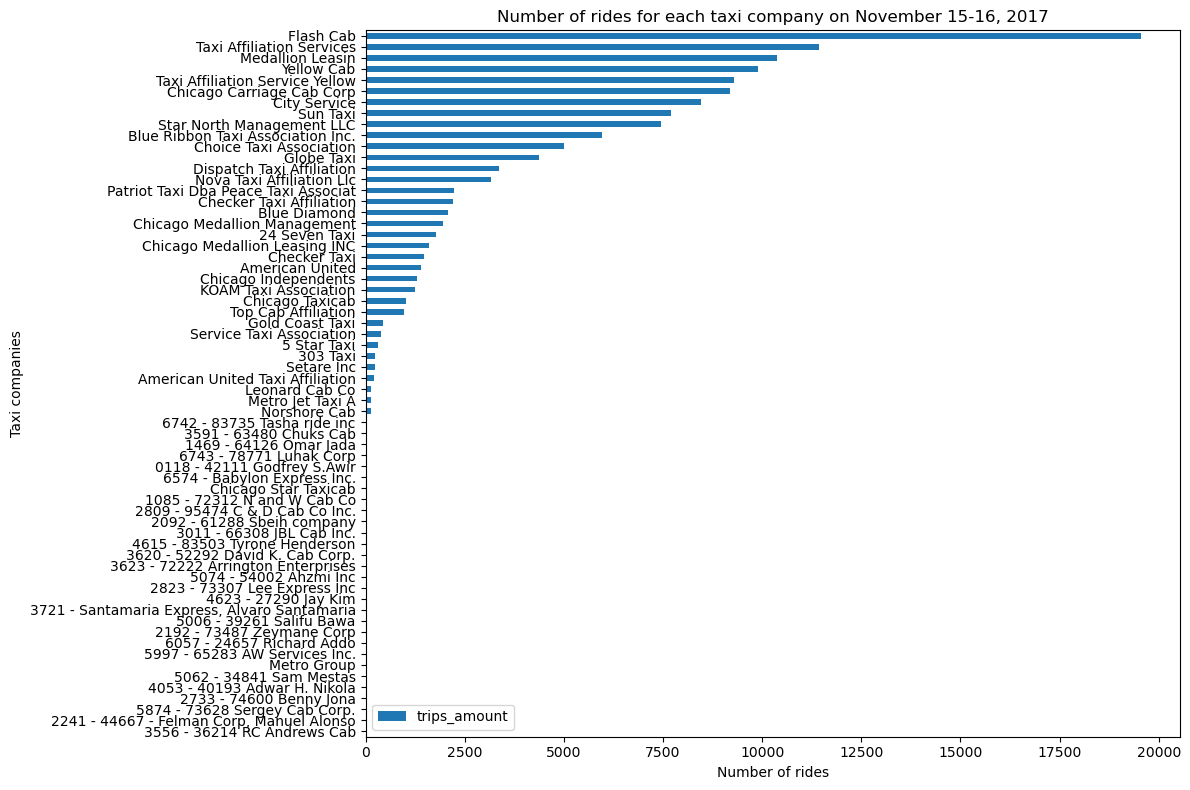

In [28]:
#Let's plot the number of rides for each taxi company

rides_taxi_company.sort_values(by='trips_amount',ascending = True).plot(x='company_name',y='trips_amount',kind='barh',figsize=(12,8))
plt.title('Number of rides for each taxi company on November 15-16, 2017')
plt.xlabel('Number of rides')
plt.ylabel('Taxi companies')
plt.tight_layout()
plt.show()

We can see on the graph that Flash Cab taxi company is a definite leader by amount of rides made on November 15-16, 2017.

The next goes group of taxi companies which includes: Taxi Affiliation Services, Medallion Leasin, Yellow Cab etc. In descriptive statistics we can see that 16 taxi companies have highest amount of rides (number of rides more than 2106). These 16 companies belong to the highest 4th quartile by the number of rides. 16 taxi companies is 25,0% of total number of taxi companies.

And we also have a lot of small taxi companies who have relatively small number of rides in comparison with the biggest taxi companies.

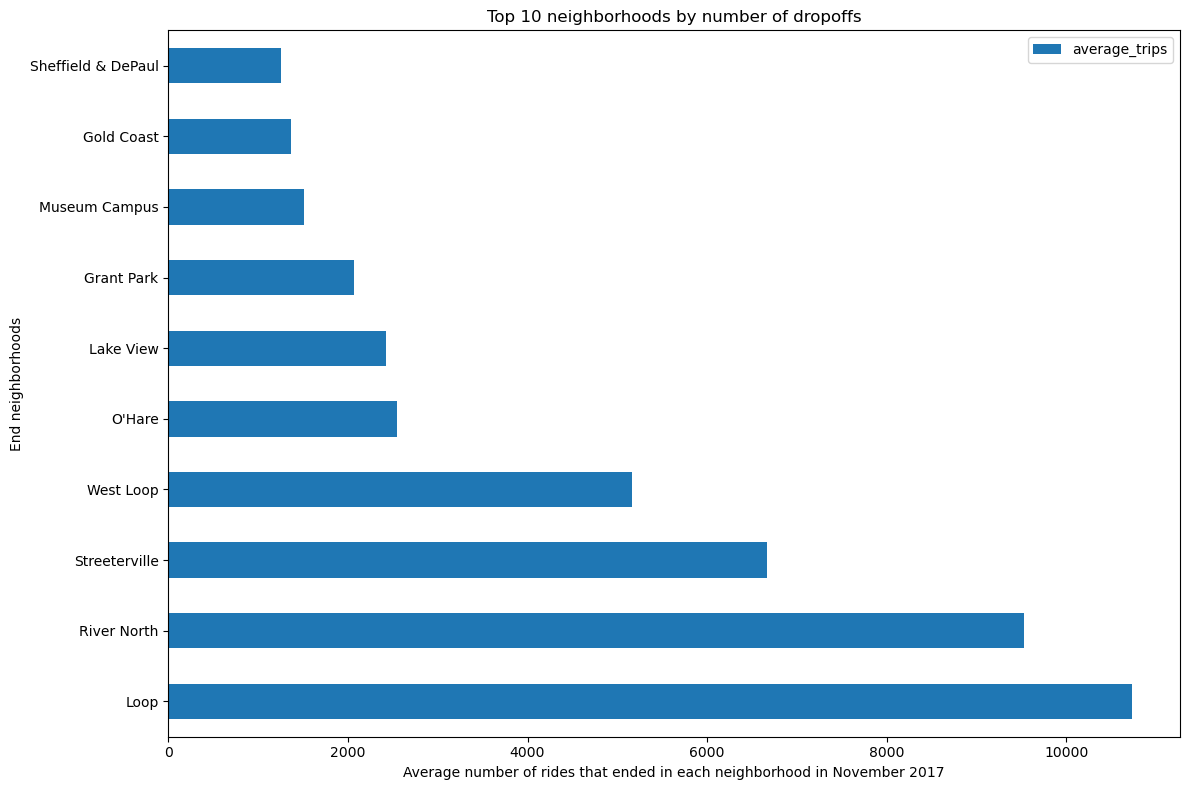

In [29]:
#let's plot the top 10 neighborhoods by number of dropoffs
top10neighborhoods.plot(x='dropoff_location_name',y='average_trips',kind='barh',figsize=(12,8))
plt.title('Top 10 neighborhoods by number of dropoffs')
plt.xlabel('Average number of rides that ended in each neighborhood in November 2017')
plt.ylabel('End neighborhoods')
plt.tight_layout()
plt.show()

Wee see from the graph that the biggest number of rides in November 2017 ended in Loop neighborhood Chicago.

Very close to the Loop neighborhood by the number of ended rides goes River North neighborhood.

The top 4 neighborhoods by number of ended rides are: Loop, River North, Streeterville and West Loop. 

The other 6 neighborhoods have twice lower number of ended rides in comparison with these top four neighborhoods.

### Conclusion

I analyzed data retrieved in the previous tasks (step2 and 3) and made graphs for it.

Files contain following data:
- First one contains data about taxi companies and number of rides each taxi company made on November 15-16, 2017
- Second one contains data about Chicago neighborhoods where rides ended and the average number of rides that ended in each neighborhood in November 2017

From the data and graphs I can conclude:
- The top 10 neighborhoods in terms of drop-offs are: **Loop, River North, Streeterville, West Loop, O’Hare, Lake View, Grant Park, Museum Campus, Gold Coast and Sheffield & DePaul**.
- **Flash Cab taxi company is a leader by amount of rides made** on November 15-16, 2017. This company completed 19558 trips in this period of time.
- The next goes group of 15 taxi companies (or 16 including Flash Cab taxi company). These 16 taxi companies have highest amount of rides (number of rides more than 2106, 4th quartile according to the descriptive statistics).
- **16 taxi companies made the highest amount of rides. This means that 25,0% of total number of taxi companies made the highest amount of rides**.
- We also have a lot of small taxi companies who have relatively small number of rides in comparison with the biggest taxi companies.
- **The biggest number of rides in November 2017 ended in Loop neighborhood Chicago**.
- The top 4 neighborhoods by number of ended rides are: Loop, River North, Streeterville and West Loop.
- The other 6 neighborhoods among top 10 neighborhoods by number of ended rides have twice lower number of ended rides in comparison with these top four neighborhoods.

###  Step 5. Testing hypotheses (Python)
<a class="anchor" id="step5"></a>

<b>project_sql_result_07.csv</b> — the result of the last query. It contains data on rides from the Loop to O'Hare International Airport. <br>
Remember, these are the table's field values:<br>
- start_ts - pickup date and time<br>
- weather_conditions - weather conditions at the moment the ride started duration_seconds - ride duration in seconds

Test the hypothesis:<br>
<b>"The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays."</b><br>
<br>
Set the significance level (alpha) value independently.<br> 
Explain:<br>
- how you formed the null and alternative hypotheses 
- what criterion you used to test the hypotheses and why

In [30]:
#let's read the file with data about rides from the Loop to O'Hare International Airport
#rides_loop_airport = pd.read_csv('project_sql_result_07.csv')

#code for the platform:
rides_loop_airport = pd.read_csv('project_sql_result_07.csv')

In [31]:
#let's look on the data we read from csv file
rides_loop_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [32]:
#sample rows from the dataset
rides_loop_airport.sample(10)

,start_ts,weather_conditions,duration_seconds
457,2017-11-11 14:00:00,Good,2820.0
503,2017-11-11 17:00:00,Good,2100.0
17,2017-11-25 10:00:00,Good,1502.0
991,2017-11-11 04:00:00,Good,1380.0
108,2017-11-25 08:00:00,Good,1277.0
284,2017-11-11 06:00:00,Good,1320.0
99,2017-11-04 08:00:00,Good,1677.0
228,2017-11-04 10:00:00,Good,2112.0
96,2017-11-11 07:00:00,Good,1200.0
1039,2017-11-04 06:00:00,Good,1200.0


We see in info about dataset that 'start_ts' column is an object type, when it should be datetype. Let's convert it.

In [33]:
#convert 'start_ts' column into datetime type
rides_loop_airport['start_ts'] = pd.to_datetime(rides_loop_airport['start_ts'],format='%Y.%m.%d')

In [34]:
#now we see that 'start_ts' column is datetime64[ns] type
rides_loop_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


We should test the hypothesis: "The average duration of rides from Loop neighborhood to O'Hare International Airport changes **on rainy Saturdays."**

So let's check what exactly week days we have in our dataset.

In [35]:
rides_loop_airport['weekday'] = rides_loop_airport['start_ts'].dt.dayofweek
rides_loop_airport['weekday'].value_counts()

5    1068
Name: weekday, dtype: int64

We see from the value_counts() method that the dataset contains information only about Saturdays.<br> 
(0 - Monday, 1 - Tuesday, 2 - Wednesday, 3 - Thursday, 4 - Friday, 5 - Saturday)<br> 
<br> 
So we can just create slices of dataset by weather condition and test our hypothesis.

In [36]:
#let's look how many data for each weather condition we have
rides_loop_airport['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

We see that in Chicago 8 times more sunny days than rainy.

In [37]:
#let's create a data slices with good weather conditions
good = rides_loop_airport[rides_loop_airport['weather_conditions']=='Good']
#everything looks correct
good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            888 non-null    datetime64[ns]
 1   weather_conditions  888 non-null    object        
 2   duration_seconds    888 non-null    float64       
 3   weekday             888 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 34.7+ KB


In [38]:
#data slices with bad weather conditions
bad = rides_loop_airport[rides_loop_airport['weather_conditions']=='Bad']
#everything looks correct
bad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            180 non-null    datetime64[ns]
 1   weather_conditions  180 non-null    object        
 2   duration_seconds    180 non-null    float64       
 3   weekday             180 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 7.0+ KB


We should test the hypothesis:
**"The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays."**

Let's formulate zero hypothesis to test our statement:

The null hypothesis, H0, is a statement of “no effect” or “no difference” or average rides durations in rainy and sunny days are equal. The alternative hypothesis tells that the average durations of rides in rainy and sunny days  are not equal:

- H0 - the average duration of rides from Loop neighborhood to O'Hare International Airport in rainy Saturdays and average duration of of rides from Loop neighborhood to O'Hare International Airport in sunny Saturdays **are equal**.
- H1 - the average duration of rides in rainy Saturdays and in sunny Saturdays **are not equal**.

To test this hypotheses I will apply the method scipy.stats.ttest_ind(array1, array2, equal_var). One of assunptions of t-test tells about variations equality. So if our data samples have equal variances we use equal_var parameter equal **True** of ttest_ind, otherwise - **False**. To get to know if we have equal variances of data samples, let's apply Levene's test. 

I will use the 1% critical statistical significance level as more strict.

In [39]:
#let's calculate variances just to look on it
print('Dispersion of duration_seconds column for rainy Saturdays',np.var(good['duration_seconds']))
print()
print('Dispersion of duration_seconds column for other Saturdays',np.var(bad['duration_seconds']))

Dispersion of duration_seconds column for rainy Saturdays 575732.9308497686

Dispersion of duration_seconds column for other Saturdays 517403.5633024689


In [40]:
#let's call the Levene’s test function and enter the name of the samples
# our samples are good['duration_seconds'] and bad['duration_seconds']

#The null hypothesis formed in the Levene’s test is that the groups we are comparing have equal variance

st.levene(good['duration_seconds'], bad['duration_seconds'], center='mean')

LeveneResult(statistic=0.7184273561022895, pvalue=0.3968505113995001)

In [41]:
#let's check if we can reject of the null hypothesis of the Levene’s test 
# which says that the groups we are comparing have equal variance

if (0.3968505113995001 < 0.01):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

We can't reject the null hypothesis


We see that with 1% critical statistical significance level, we can't reject hypothesis which tells that data slices of good and bad weather conditions have equal variance. Means, yes, these two datasets have equal variance. 
<br><br>
Now we can make t-test.

In [42]:
alpha = .01 # critical statistical significance level
            # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
        good['duration_seconds'], 
        bad['duration_seconds'],
        equal_var = True)

print('statistical significance level',alpha)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

statistical significance level 0.01
p-value:  6.517970327099473e-12
We reject the null hypothesis


In the test above we get the result on 1% significance level that **we should reject the null hypothesis** that the average duration of rides from Loop neighborhood to O'Hare International Airport in rainy Saturdays and in sunny Saturdays **are equal**.

It means that the alternative hypothesis is correct. The alternative hypothesis says: the average duration of rides in rainy Saturdays and in sunny Saturdays **are not equal.**

So we confirm our statement **"The average duration of rides from Loop neighborhood to O'Hare International Airport <u><b>changes</b></u> on rainy Saturdays."**

### Conclusion

I tested the statement **"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."**

To test this statement I formulated the null and alternative hypotheses: 

- H0 - the average duration of rides from Loop neighborhood to O'Hare International Airport in rainy Saturdays and average duration of of rides from Loop neighborhood to O'Hare International Airport in sunny Saturdays **are equal**.
- H1 - the average duration of rides in rainy Saturdays and in sunny Saturdays **are not equal**.

To test hypotheses I used the method scipy.stats.ttest_ind(array1, array2, equal_var).
Before making the t-test I checked if the variances of data samples are equal. To do this I made Levene's test of equal variances. In the Levene's test I confirmed that the variances are equal. 

With 1% significance level I rejected the null hypothesis of t-test, so I took the alternative hypothesis which says: that the average duration of rides in rainy Saturdays and in sunny Saturdays are not equal.

So I can make following conclusion: 
- **I confirm with 1% significance level that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.**

###  Overall Conclusion
<a class="anchor" id="step6"></a>

We have datasets retrieved with the help of SQL. The datasets contain information about taxi rides in Chicago in November 2017. I also have dataframe with data about weather in Chicago in November 2017  which I parsed from the meteo website.

I analyzed the data and I can make following conclusions about it:

- The top 10 neighborhoods in terms of drop-offs are: **Loop, River North, Streeterville, West Loop, O’Hare, Lake View, Grant Park, Museum Campus, Gold Coast and Sheffield & DePaul**.
- **Flash Cab taxi company is a leader by amount of rides made** on November 15-16, 2017. This company completed 19558 trips in this period of time.
- **16 taxi companies made the highest amount of rides. This means that 25,0% of total number of taxi companies made the highest amount of rides**.
- **The biggest number of rides in November 2017 ended in Loop neighborhood Chicago**.
- The top 4 neighborhoods by number of ended rides are: Loop, River North, Streeterville and West Loop.

I tested following statement with t-test and got the following result:

**Statement:** "The average duration of rides from the Loop to O'Hare International Airport <u>changes</u> on rainy Saturdays." <br>
**Result:** With the 1% significance level I confirmed the statement is **True**.